# Brother in Arms

Kaggle Dataset: https://www.kaggle.com/dell4010/brothers-in-arms
        
Context

Arms trade tells a lot about what is happening in the world. How countries are building their arsenal in the modern times.
Is future going to be peaceful or is it just the calm before the storm. What are different countries up to in ?
Content

Arms transfer were downloaded and cleaned from SIPRI (https://www.sipri.org/databases/armstransfers)
SIPRI has lot of other interesting databases please explore.

    Arms export by country from 1950-2019
    Arms import by country from 1950-2019
    Arms export by Weapon from 1950-2019
    Top Arms suppliers from 2015-2019

Acknowledgements

Data from:-
https://www.sipri.org/databases/armstransfers
Came to know about data from:
https://www.data-is-plural.com/
Inspiration

Files can be used to answer multiple questions such as

    Which countries are importing and exporting arms
    What does arms import tells about the country stability
    What kind of weapons are being supplied
    How countries around world are building their arsenal

################################################################################

Special Note: The analysis is done only for educational purposes.

Work by: Raghavendra Tapas

################################################################################

In [1]:
# Libraries and dependencies for basic visuals and analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
companies = pd.read_csv("Arms-Companies-2015-2019.csv")
companies

,Company,Country,Arms sales (2019),Arms sales (2018),Arms sales (2017),Arms sales (2016),Arms sales (2015)
0,Lockheed Martin Corp.,United States,53230.0,47260.0,43880.0,40630.0,36440.0
1,Boeing,United States,33580.0,32120.0,29450.0,29510.0,27960.0
2,Northrop Grumman Corp.,United States,29220.0,26190.0,22370.0,21400.0,20060.0
3,Raytheon,United States,25320.0,23440.0,22040.0,22910.0,21780.0
4,General Dynamics Corp.,United States,24500.0,22000.0,19500.0,19200.0,19240.0
5,AVIC,China,22470.0,22290.0,20130.0,17360.0,15720.0
6,BAE Systems,United Kingdom,22240.0,21210.0,20990.0,22790.0,25510.0
7,CETC,China,15090.0,13860.0,12170.0,10970.0,12000.0
8,NORINCO Group,China,14540.0,14880.0,17190.0,17320.0,16910.0
9,L3Harris Technologies,United States,13920.0,13220.0,7750.0,7630.0,8770.0


In [3]:
companies.shape

(42, 7)

## Data Cleaning

In [80]:
# drop rows that are completely empty
companies = companies.dropna(axis=0, how='all')

# fill empty cells with 0. Note that mean or median filling can also be done.
companies.fillna(0, inplace=True)
companies.shape

(29, 8)

In [87]:
companies

,Company,Country,Arms sales (2019),Arms sales (2018),Arms sales (2017),Arms sales (2016),Arms sales (2015),Total_Sales
0,Lockheed Martin Corp.,United States,53230.0,47260.0,43880.0,40630.0,36440.0,221440.0
1,Boeing,United States,33580.0,32120.0,29450.0,29510.0,27960.0,152620.0
2,Northrop Grumman Corp.,United States,29220.0,26190.0,22370.0,21400.0,20060.0,119240.0
3,Raytheon,United States,25320.0,23440.0,22040.0,22910.0,21780.0,115490.0
4,General Dynamics Corp.,United States,24500.0,22000.0,19500.0,19200.0,19240.0,104440.0
5,AVIC,China,22470.0,22290.0,20130.0,17360.0,15720.0,97970.0
6,BAE Systems,United Kingdom,22240.0,21210.0,20990.0,22790.0,25510.0,112740.0
7,CETC,China,15090.0,13860.0,12170.0,10970.0,12000.0,64090.0
8,NORINCO Group,China,14540.0,14880.0,17190.0,17320.0,16910.0,80840.0
9,L3Harris Technologies,United States,13920.0,13220.0,7750.0,7630.0,8770.0,51290.0


In [96]:
companies = companies[sorted(companies.columns)]
companies = companies.reindex(columns=['Company', 'Country', 'Arms sales (2015)', 'Arms sales (2016)', 'Arms sales (2017)', 'Arms sales (2018)', 'Arms sales (2019)'])
companies['Total_Sales'] = companies['Arms sales (2019)'] + companies['Arms sales (2018)'] + companies['Arms sales (2017)'] + companies['Arms sales (2016)'] + companies['Arms sales (2015)']
companies.head()

,Company,Country,Arms sales (2015),Arms sales (2016),Arms sales (2017),Arms sales (2018),Arms sales (2019),Total_Sales
0,Lockheed Martin Corp.,United States,36440.0,40630.0,43880.0,47260.0,53230.0,221440.0
1,Boeing,United States,27960.0,29510.0,29450.0,32120.0,33580.0,152620.0
2,Northrop Grumman Corp.,United States,20060.0,21400.0,22370.0,26190.0,29220.0,119240.0
3,Raytheon,United States,21780.0,22910.0,22040.0,23440.0,25320.0,115490.0
4,General Dynamics Corp.,United States,19240.0,19200.0,19500.0,22000.0,24500.0,104440.0


In [107]:
companies[(companies['Country'] == 'United States')]

,Company,Country,Arms sales (2015),Arms sales (2016),Arms sales (2017),Arms sales (2018),Arms sales (2019),Total_Sales
0,Lockheed Martin Corp.,United States,36440.0,40630.0,43880.0,47260.0,53230.0,221440.0
1,Boeing,United States,27960.0,29510.0,29450.0,32120.0,33580.0,152620.0
2,Northrop Grumman Corp.,United States,20060.0,21400.0,22370.0,26190.0,29220.0,119240.0
3,Raytheon,United States,21780.0,22910.0,22040.0,23440.0,25320.0,115490.0
4,General Dynamics Corp.,United States,19240.0,19200.0,19500.0,22000.0,24500.0,104440.0
9,L3Harris Technologies,United States,8770.0,7630.0,7750.0,13220.0,13920.0,51290.0
10,United Technologies Corp.,United States,9500.0,6870.0,7780.0,9310.0,13100.0,46560.0
15,Huntington Ingalls Industries,United States,6740.0,6720.0,6470.0,7200.0,7740.0,34870.0
17,Honeywell International,United States,0.0,3480.0,4460.0,5430.0,5330.0,18700.0
18,Leidos,United States,3290.0,4300.0,4380.0,5000.0,5330.0,22300.0


In [190]:
table = companies.drop(['Company', 'Total_Sales'], axis = 1)
table = table.groupby(['Country']).sum()
# table.reset_index(inplace=True)
table

,Arms sales (2015),Arms sales (2016),Arms sales (2017),Arms sales (2018),Arms sales (2019)
Country,,,,,
China,53710.0,53730.0,54120.0,55240.0,56710.0
France,8100.0,11650.0,13070.0,12400.0,15230.0
Italy,9300.0,8500.0,8820.0,9820.0,11110.0
Japan,3470.0,0.0,0.0,0.0,0.0
Russia,11520.0,10170.0,13550.0,14340.0,13920.0
Trans-European,12860.0,12520.0,9980.0,11650.0,11050.0
United Arab Emirates,0.0,0.0,0.0,0.0,4750.0
United Kingdom,30300.0,27240.0,25410.0,25890.0,26950.0
United States,166250.0,170850.0,176850.0,199500.0,221170.0


<Figure size 1080x720 with 0 Axes>

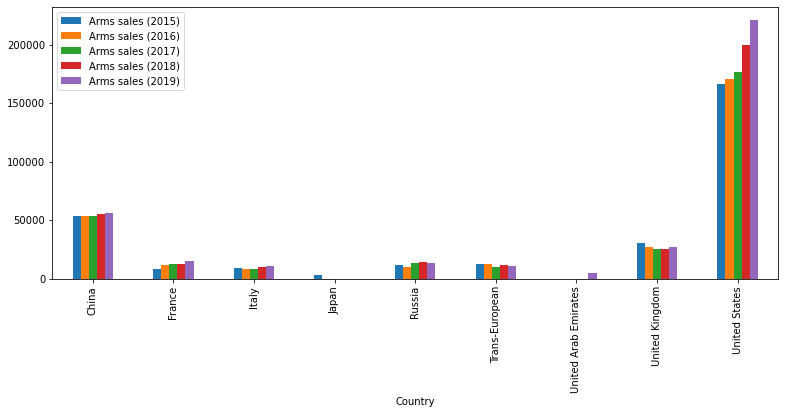

In [195]:
plt.figure(figsize = (15, 10))
table.plot.bar();

## What are the Companies Belonging to specified country and how do they compare to each other?

What are the top 5 companies in Arms sales in a given country?

In [8]:
# Function to plot line graph and calculate total sales of the input country

def plot_bar(df, country, width, height):
    plt.figure(figsize = (width, height))
    filtered_results = df[(df['Country'] == country)]
    sns.barplot(x = filtered_results.Total_Sales, y = filtered_results.Company, data = filtered_results, orient='h')
    plt.xlabel("Total Arms Sales (2015-2019)")
    plt.ylabel("Companies")

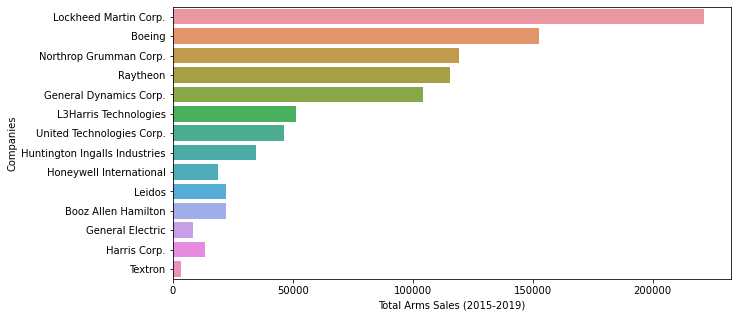

In [9]:
plot_bar(companies, 'United States', 10, 5)

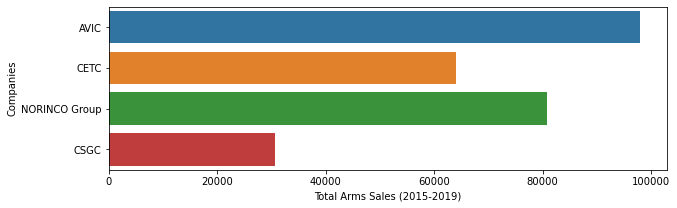

In [81]:
plot_bar(companies, 'China', 10, 3)

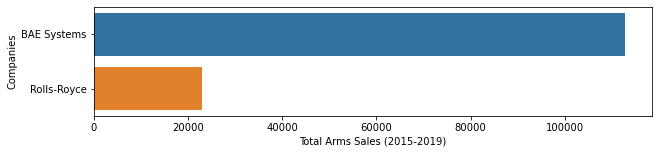

In [82]:
plot_bar(companies, 'United Kingdom', 10, 2)

## What is the yearly trend of buying Arms of a specified Country?

In [13]:
companies[(companies['Country'] == 'United States')]

,Company,Country,Arms sales (2019),Arms sales (2018),Arms sales (2017),Arms sales (2016),Arms sales (2015),Total_Sales
0,Lockheed Martin Corp.,United States,53230.0,47260.0,43880.0,40630.0,36440.0,221440.0
1,Boeing,United States,33580.0,32120.0,29450.0,29510.0,27960.0,152620.0
2,Northrop Grumman Corp.,United States,29220.0,26190.0,22370.0,21400.0,20060.0,119240.0
3,Raytheon,United States,25320.0,23440.0,22040.0,22910.0,21780.0,115490.0
4,General Dynamics Corp.,United States,24500.0,22000.0,19500.0,19200.0,19240.0,104440.0
9,L3Harris Technologies,United States,13920.0,13220.0,7750.0,7630.0,8770.0,51290.0
10,United Technologies Corp.,United States,13100.0,9310.0,7780.0,6870.0,9500.0,46560.0
15,Huntington Ingalls Industries,United States,7740.0,7200.0,6470.0,6720.0,6740.0,34870.0
17,Honeywell International,United States,5330.0,5430.0,4460.0,3480.0,0.0,18700.0
18,Leidos,United States,5330.0,5000.0,4380.0,4300.0,3290.0,22300.0


               Arms sales (2015)  Arms sales (2016)  Arms sales (2017)  \
Country                                                                  
United States           166250.0           170850.0           176850.0   

               Arms sales (2018)  Arms sales (2019)  
Country                                              
United States           199500.0           221170.0  


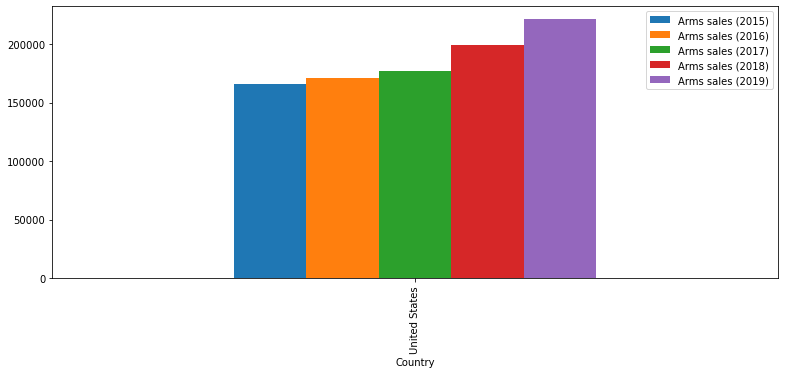

In [198]:
# function that plots bar graph of specified country
def plot_bar(country):
    filter_country = companies[(companies['Country'] == country)]
    filter_country = filter_country.drop(['Total_Sales'], axis='columns')
    filter_country = filter_country.groupby('Country').sum()
    print(filter_country)
    filter_country.plot.bar()
plot_bar('United States')

                Arms sales (2015)  Arms sales (2016)  Arms sales (2017)  \
Country                                                                   
United Kingdom            30300.0            27240.0            25410.0   

                Arms sales (2018)  Arms sales (2019)  
Country                                               
United Kingdom            25890.0            26950.0  


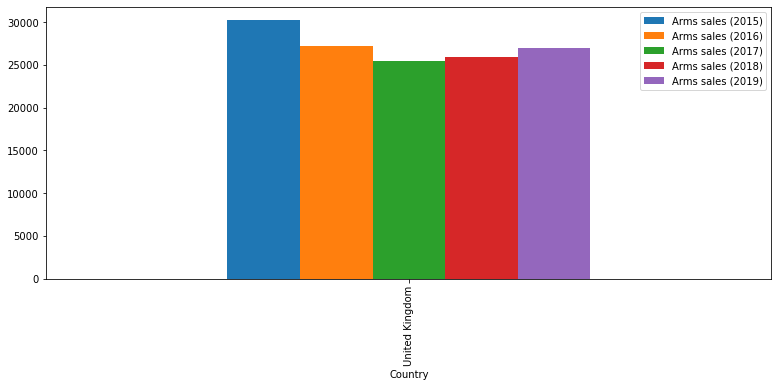

In [199]:
plot_bar('United Kingdom')

## Compare the grand total Arms sales of all countries

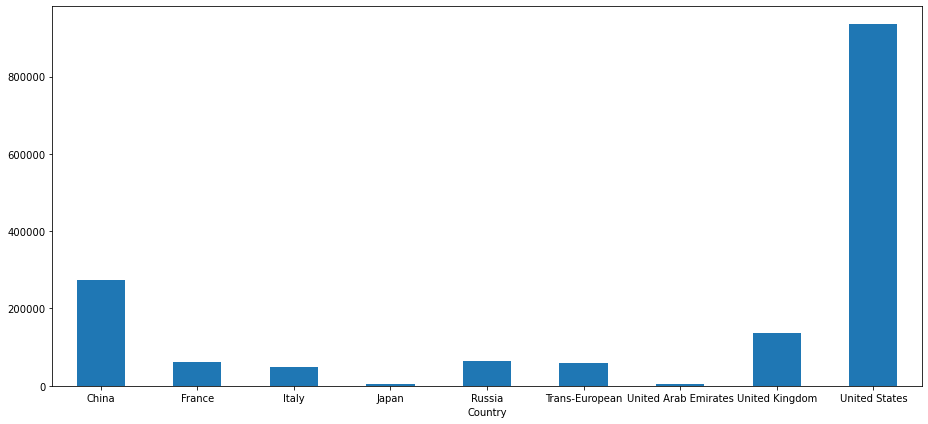

In [200]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13, 6)
companies.groupby('Country').sum()['Total_Sales'].plot.bar()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()